# Metagenomic-based Diagnostic for Sepsis (Karius | Drop Confirmed Features)

We asked if we could discriminate sepsis without "confirmed" (i.e. culture-positive) pathogens. The ability to do so using a stringently decontaminated feature space would provide evidence for a polymicrobial theory of sepsis.

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

cwd = Path.cwd()
datasets = cwd / 'datasets'
results = cwd / 'results/drop_confirmed_features_full'

## Data Preprocessing
Since we are using stratified kfold, a validation split is not necesssary.

### Load data

In [2]:
raw_df = pd.read_csv(datasets / 'karius_genus_raw_maxi.csv')
display(raw_df)

X = raw_df.iloc[:, 2:].copy()
y = raw_df.iloc[:, 1].copy()

,pathogen,y,Streptococcus,Lactococcus,Lactobacillus,Pediococcus,Enterococcus,Granulicatella,Staphylococcus,Gemella,...,Cryptosporidium,Cr3virus,Tritonibacter,Desulfomicrobium,Adlercreutzia,Sulfolobus,Apibacter,Cephaloticoccus,Anderseniella,Rhinocladiella
0,none,healthy,9.0,4.0,1.0,0.0,0.0,0.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,none,healthy,9.0,3.0,0.0,0.0,1.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,none,healthy,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,none,healthy,13.0,0.0,2.0,0.0,0.0,0.0,11.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,none,healthy,15.0,1.0,1.0,0.0,0.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,Escherichia coli,septic,25.0,2.0,1.0,0.0,0.0,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
283,Cryptococcus neoformans,septic,25.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,Streptococcus oralis,septic,1343.0,4.0,4.0,0.0,1.0,2.0,12.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,Escherichia coli,septic,3.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Get features of "causal/confirmed pathogens"
pathogens = raw_df.pathogen
pathogens = pathogens.str.strip().str.split(' ', expand=True)[0].unique()
pathogens = pathogens[pathogens != 'Human']  # Human herpesvirus

# If no fungi
pathogens = pathogens[pathogens != 'none']
pathogens = np.append(pathogens, ['Lymphocryptovirus', 'Simplexvirus'])

display(pathogens)

# Feature space with only these features
X_only = X[pathogens].copy()

# Drop these features from feature space
X = X.drop(pathogens, axis=1)

array(['Escherichia', 'Streptococcus', 'Mycobacterium', 'Cytomegalovirus',
       'Staphylococcus', 'Proteus', 'Klebsiella', 'Pseudomonas',
       'Moraxella', 'Enterococcus', 'Enterobacter', 'Citrobacter',
       'Haemophilus', 'Fusobacterium', 'Candida', 'Salmonella',
       'Serratia', 'Aerococcus', 'Campylobacter', 'Cryptococcus',
       'Lymphocryptovirus', 'Simplexvirus'], dtype=object)

In [4]:
# Drop features from simple decontam feature space
decontaminated_pathogens = pd.read_csv(datasets / 'simple_decontam_pathogens.csv', header=None)[0]
to_keep = list(set(decontaminated_pathogens) - set(pathogens))
X_simple = X.loc[:, to_keep].copy()
print(X_simple.columns)

Index(['Gemella', 'Actinomyces', 'Bifidobacterium', 'Rahnella', 'Dietzia',
       'Kocuria', 'Stenotrophomonas', 'Leifsonia', 'Granulicatella',
       'Helicobacter', 'Legionella', 'Williamsia', 'Porphyromonas',
       'Leptotrichia', 'Paracoccus', 'Weissella', 'Rhodococcus', 'Rothia',
       'Yersinia', 'Bordetella', 'Sutterella', 'Actinomadura',
       'Cellulosimicrobium', 'Cellulomonas', 'Tyzzerella', 'Alistipes',
       'Oerskovia', 'Clostridium', 'Neisseria', 'Lactobacillus', 'Cupriavidus',
       'Paenibacillus', 'Burkholderia', 'Pandoraea', 'Aggregatibacter',
       'Psychrobacter', 'Veillonella', 'Brachybacterium', 'Curtobacterium',
       'Pseudonocardia', 'Janibacter', 'Agrobacterium', 'Pantoea',
       'Nocardiopsis', 'Capnocytophaga', 'Azospirillum', 'Exiguobacterium',
       'Comamonas', 'Ochrobactrum', 'Leclercia', 'Lactococcus', 'Vibrio',
       'Aeromonas', 'Shewanella', 'Parabacteroides', 'Kytococcus',
       'Collinsella', 'Bacillus', 'Roseomonas', 'Anaerococcus',
  

In [5]:
# Binary encode y
y.loc[y == 'septic'] = 1
y.loc[y == 'healthy'] = 0
y = y.astype('int')

# Relative abundance
X_RA = X.apply(func=lambda x: x / x.sum(), axis=1)
X_only_RA = X_only.apply(func=lambda x: x / x.sum(), axis=1)
X_simple_RA = X_simple.apply(func=lambda x: x / x.sum(), axis=1)

In [6]:
n_splits = 10

pos = len(y[y == 1])
neg = len(y[y == 0])
split_sizes = pd.DataFrame({'Septic': [pos - int(pos / n_splits), int(pos / n_splits)], 
                           'Healthy': [neg - int(neg / n_splits), int(neg / n_splits)]}, index=['Train fold', 'Test fold'])

display(split_sizes)

# Get negative to positive ratio
ratio = sum(y == 0) / sum(y == 1)

,Septic,Healthy
Train fold,106,153
Test fold,11,17


## Nested CV for hyperparameter optimisation

In [7]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, average_precision_score

In [8]:
def optimise_evaluate(X, y):
    np.random.seed(66)
    ratio = sum(y == 0) / sum(y == 1)
    
    # Hyperparemeter Optimisation using grid search (F1)
    model = XGBClassifier()
    n_estimators = range(100, 500, 10)
    max_depth = range(1, 10, 1)
    gamma = np.linspace(0.1, 3, 10)
    subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
    colsample_bytree = np.linspace(0.1, 1, 20)
    
    param_grid = dict(max_depth=max_depth, 
                      n_estimators=n_estimators, 
                      colsample_bytree=colsample_bytree,
                      gamma=gamma,
                      subsample=subsample,
                      scale_pos_weight=[ratio])
    
    inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)

    # Inner CV
    model = RandomizedSearchCV(model, 
                               param_grid, 
                               scoring='roc_auc',
                               n_iter=1000,
                               n_jobs=70, 
                               cv=inner_cv, 
                               verbose=0)

    model.fit(X, y)
    best_params = model.best_params_
#     print(best_params)

    # Custom metrics
    precision = make_scorer(precision_score, average='binary')
    recall = make_scorer(recall_score, average='binary')
    f1 = make_scorer(f1_score, average='binary')
    auprc = make_scorer(average_precision_score, average=None)
    
    scoring = {'precision': precision, 
               'recall': recall, 
               'AUROC': 'roc_auc',
               'F1': f1}

    # Outer CV
    outer_results = cross_validate(model, X=X, y=y, cv=outer_cv, scoring=scoring)
    outer_results = pd.DataFrame(outer_results).mean()[['test_precision', 'test_recall', 'test_F1', 'test_AUROC']]

    return outer_results, best_params


### Optimise and evaluate models trained on dirty data

In [9]:
raw_results, raw_params = optimise_evaluate(X, y)

RA_results, RA_params = optimise_evaluate(X_RA, y)

only_results, only_params = optimise_evaluate(X_only, y)

only_RA_results, only_RA_params = optimise_evaluate(X_only_RA, y)

simple_results, simple_params = optimise_evaluate(X_simple, y)

simple_RA_results, simple_RA_params = optimise_evaluate(X_simple_RA, y)

## Estimates of test error

In [10]:
metric_df = pd.DataFrame({'Without Confirmed': raw_results, 
                          'Without Confirmed (RA)': RA_results, 
                          'Only Confirmed': only_results,
                          'Only Confirmed (RA)': only_RA_results,
                          'Simple Decontam without Confirmed': simple_results,
                          'Simple Decontam without Confirmed (RA)': simple_RA_results}).round(3).T
display(metric_df)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.928,0.939,0.931,0.990
Without Confirmed (RA),0.919,0.937,0.925,0.981
Only Confirmed,0.929,0.862,0.886,0.950
Only Confirmed (RA),0.930,0.913,0.917,0.975
Simple Decontam without Confirmed,0.782,0.761,0.765,0.911
Simple Decontam without Confirmed (RA),0.803,0.787,0.791,0.900


## Train dirty models

In [11]:
raw_model = XGBClassifier(**raw_params)
raw_model.fit(X, y)

RA_model = XGBClassifier(**RA_params)
RA_model.fit(X_RA, y)

XGBClassifier(colsample_bytree=0.19473684210526315, gamma=0.7444444444444444,
              max_depth=2, n_estimators=140, scale_pos_weight=1.452991452991453,
              subsample=0.8)

### Remove Contaminants based on SHAP values

In [12]:
import math
from scipy.stats import spearmanr
import shap


def decontam(X_train, y_train, params):
    X_train = X_train.copy()
    y_train = y_train.copy()
    params = params.copy()
#     X_train = X_train.apply(func=lambda x: x / x.sum(), axis=1)
    
    model = XGBClassifier(**params)
    model.fit(X=X_train, y=y_train)

    explainer = shap.TreeExplainer(model, feature_pertubation='interventional', model_output='probability', data=X_train)
    shap_val = explainer.shap_values(X_train)

    to_retain = np.array([True] * X_train.shape[1])
    corrs = np.zeros(X_train.shape[1])
    
    for i in range(X_train.shape[1]):
        if sum(X_train.iloc[:, i] != 0) >= X_train.shape[0] * 0.1:
            rho = spearmanr(X_train.iloc[:, i], shap_val[:, i])[0]
            p = spearmanr(X_train.iloc[:, i], shap_val[:, i])[1]
            print(f'rho={rho}, p={p}, genus={X_train.columns[i]}')
            
            if rho < 0:
                to_retain[i] = False
                
            elif not shap_val[:, i].any(0):
                to_retain[i] = False
        else:
            to_retain[i] = False

    to_retain = X_train.columns[to_retain]
    print(to_retain.shape, to_retain)
    
    return to_retain

In [13]:
# Retrieve known human pathogens
meta = pd.read_csv(datasets / 'pathogen_list.csv', encoding= 'unicode_escape')
meta = meta['Genus'].unique()

# Remove non-human pathogens
genera_new = X.columns
genera_new = list(set(genera_new).intersection(set(meta)))

In [14]:
# Decontam using raw_params
for _ in range(10):
    genera_new = decontam(X.loc[:, genera_new], y, raw_params)

rho=-0.5139941423208809, p=9.400975337452333e-21, genus=Leptospira
rho=-0.9193869061569734, p=1.674242915081224e-117, genus=Alishewanella
rho=0.8579006216974703, p=2.0904862214767123e-84, genus=Actinomyces
rho=-0.3882646550573839, p=9.214489601231792e-12, genus=Gemella
rho=-0.8265512560911296, p=4.174444609472073e-73, genus=Kocuria
rho=nan, p=nan, genus=Granulicatella
rho=nan, p=nan, genus=Helicobacter
rho=nan, p=nan, genus=Saccharopolyspora
rho=nan, p=nan, genus=Legionella
rho=0.06754656850400381, p=0.2540278279154947, genus=Porphyromonas
rho=0.19733978770553326, p=0.0007747102411565581, genus=Leptotrichia
rho=nan, p=nan, genus=Tsukamurella
rho=nan, p=nan, genus=Sutterella
rho=nan, p=nan, genus=Dialister
rho=0.6178581301211687, p=1.3238892130584657e-31, genus=Cellulomonas
rho=nan, p=nan, genus=Alistipes
rho=0.7058325714284125, p=1.411202968164812e-44, genus=Lactobacillus
rho=nan, p=nan, genus=Leuconostoc
rho=-0.3817803583456789, p=2.159100286819852e-11, genus=Aggregatibacter
rho=-0.54

An input array is constant; the correlation coefficent is not defined.


rho=0.9303852316881106, p=3.1221535699053557e-126, genus=Burkholderia
rho=-0.6693600043165168, p=1.1699043409835619e-38, genus=Flavobacterium
rho=-0.9093349269814853, p=1.4996865263403967e-110, genus=Micrococcus
rho=0.5215289765910128, p=2.0288924362050384e-21, genus=Lachnoanaerobaculum
rho=0.22852968235242666, p=9.365757862783177e-05, genus=Clostridioides
rho=-0.7944414215459444, p=1.1257496745706985e-63, genus=Finegoldia
rho=-0.520559103594345, p=2.4768840652190393e-21, genus=Janibacter
rho=0.7060952679603617, p=1.2696063584845793e-44, genus=Agrobacterium
rho=0.4666009050765724, p=6.372575619279234e-17, genus=Capnocytophaga
rho=0.2862636000105994, p=8.137224705187435e-07, genus=Parabacteroides
rho=nan, p=nan, genus=Kluyvera
rho=-0.6221226457294727, p=3.866516824437826e-32, genus=Roseomonas
rho=-0.8477993976699495, p=1.729411638789168e-80, genus=Gordonia
rho=0.8543916686023647, p=5.184034725023426e-83, genus=Acinetobacter
rho=nan, p=nan, genus=Eikenella
rho=0.6764927973063993, p=9.501

rho=0.09336818625960183, p=0.11449580921180848, genus=Cellulomonas
rho=0.6756843973199083, p=1.2674168754483903e-39, genus=Pantoea
rho=0.5360031975031315, p=9.562149627763844e-23, genus=Cronobacter
rho=0.5901008816585291, p=2.5698593394379593e-28, genus=Megasphaera
rho=0.2157132252982763, p=0.00023149668556597227, genus=Prevotella
rho=0.30364122351739653, p=1.5549232674399408e-07, genus=Stenotrophomonas
rho=0.6170319327944233, p=1.6767432991856762e-31, genus=Shigella
rho=0.6092599004767436, p=1.4965001295708926e-30, genus=Shewanella
rho=0.8179610655727063, p=2.1128644694623297e-70, genus=Bacillus
rho=0.5791460136873222, p=4.190896807560233e-27, genus=Alphatorquevirus
rho=0.6201708392949585, p=6.807468421370624e-32, genus=Cupriavidus
rho=0.9290764263939411, p=4.034613982213914e-125, genus=Burkholderia
rho=0.6034098387810194, p=7.472976686508277e-30, genus=Clostridioides
rho=0.4826183285252451, p=3.762195874541717e-18, genus=Agrobacterium
rho=0.8423782545215707, p=1.677993095013364e-78, 

rho=0.09336818625960183, p=0.11449580921180848, genus=Cellulomonas
rho=0.6756843973199083, p=1.2674168754483903e-39, genus=Pantoea
rho=0.5360031975031315, p=9.562149627763844e-23, genus=Cronobacter
rho=0.5901008816585291, p=2.5698593394379593e-28, genus=Megasphaera
rho=0.2157132252982763, p=0.00023149668556597227, genus=Prevotella
rho=0.30364122351739653, p=1.5549232674399408e-07, genus=Stenotrophomonas
rho=0.6170319327944233, p=1.6767432991856762e-31, genus=Shigella
rho=0.6092599004767436, p=1.4965001295708926e-30, genus=Shewanella
rho=0.8179610655727063, p=2.1128644694623297e-70, genus=Bacillus
rho=0.5791460136873222, p=4.190896807560233e-27, genus=Alphatorquevirus
rho=0.6201708392949585, p=6.807468421370624e-32, genus=Cupriavidus
rho=0.9290764263939411, p=4.034613982213914e-125, genus=Burkholderia
rho=0.6034098387810194, p=7.472976686508277e-30, genus=Clostridioides
rho=0.4826183285252451, p=3.762195874541717e-18, genus=Agrobacterium
rho=0.8423782545215707, p=1.677993095013364e-78, 

In [15]:
# Decontam + pathogens
raw_CR = X[genera_new]

# Normalise RA
RA_CR = raw_CR.apply(func=lambda x: x / x.sum(), axis=1)

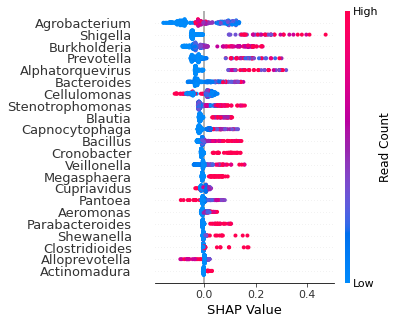

In [16]:
# Get SHAP summary before removing Cellulomonas and Agrobacterium
pre_model = XGBClassifier(**raw_params)
pre_model.fit(X=raw_CR, y=y)

pre_explainer = shap.TreeExplainer(pre_model, feature_pertubation='interventional', model_output='probability', data=raw_CR)
shap_pre = pre_explainer.shap_values(raw_CR)

shap.summary_plot(shap_pre, raw_CR, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=25)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'pre_shap.png', dpi=600, format='png', bbox_inches='tight')


### Number of Features

In [17]:
print('Neat', X.shape)
print('CR', raw_CR.shape)

Neat (287, 1542)
CR (287, 22)


## Optimise and evaluate decontaminated models

In [18]:
raw_CR_results, raw_CR_params = optimise_evaluate(raw_CR, y)
# raw_CR_params = {'subsample': 0.7631578947368421, 'scale_pos_weight': 1.4273504273504274, 'n_estimators': 426, 'max_depth': 1, 'gamma': 0.0, 'colsample_bytree': 0.1}

RA_CR_results, RA_CR_params = optimise_evaluate(RA_CR, y)
# RA_CR_params = {'subsample': 0.38421052631578945, 'scale_pos_weight': 1.4273504273504274, 'n_estimators': 101, 'max_depth': 5, 'gamma': 2.894736842105263, 'colsample_bytree': 0.19473684210526315}

metric_df = metric_df.append(pd.DataFrame({'Without Confirmed CR': raw_CR_results, 'Without Confirmed (RA)': RA_CR_results}).round(3).T)
display(metric_df)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.928,0.939,0.931,0.990
Without Confirmed (RA),0.919,0.937,0.925,0.981
Only Confirmed,0.929,0.862,0.886,0.950
Only Confirmed (RA),0.930,0.913,0.917,0.975
Simple Decontam without Confirmed,0.782,0.761,0.765,0.911
Simple Decontam without Confirmed (RA),0.803,0.787,0.791,0.900
Without Confirmed CR,0.803,0.727,0.756,0.915
Without Confirmed (RA),0.828,0.736,0.772,0.903


### Fit clean models

In [19]:
raw_CR_model = XGBClassifier(**raw_CR_params)
raw_CR_model.fit(raw_CR, y)

RA_CR_model = XGBClassifier(**RA_CR_params)
RA_CR_model.fit(RA_CR, y)

XGBClassifier(colsample_bytree=0.1, gamma=2.6777777777777776, n_estimators=320,
              scale_pos_weight=1.452991452991453, subsample=1.0)

## Interpreting model using SHAP values

### Plot of SHAP values per Feature

In [20]:
import matplotlib.pyplot as plt
explainer_CR = shap.TreeExplainer(raw_CR_model, feature_pertubation='interventional', model_output='probability', data=raw_CR)
shap_CR = explainer_CR.shap_values(raw_CR)

explainer_raw = shap.TreeExplainer(raw_model, feature_pertubation='interventional', model_output='probability', data=X)
shap_raw = explainer_raw.shap_values(X)

#### Dirty raw

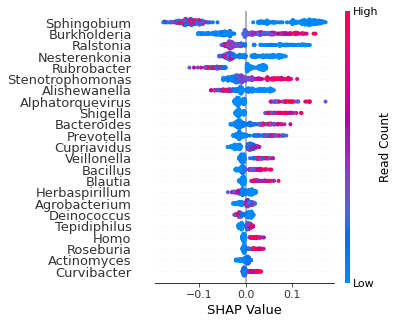

In [21]:
shap.summary_plot(shap_raw, X, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=23)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'raw_shap.png', dpi=600, format='png', bbox_inches='tight')

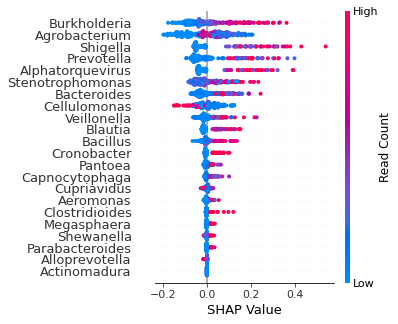

In [22]:
shap.summary_plot(shap_CR, raw_CR, show=False, plot_size=(4, 5), color_bar_label='Read Count', max_display=35)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
plt.savefig(results / 'raw_CR_shap.png', dpi=600, format='png', bbox_inches='tight')

### Force plot for healthy patient

Actual Classification 0
23


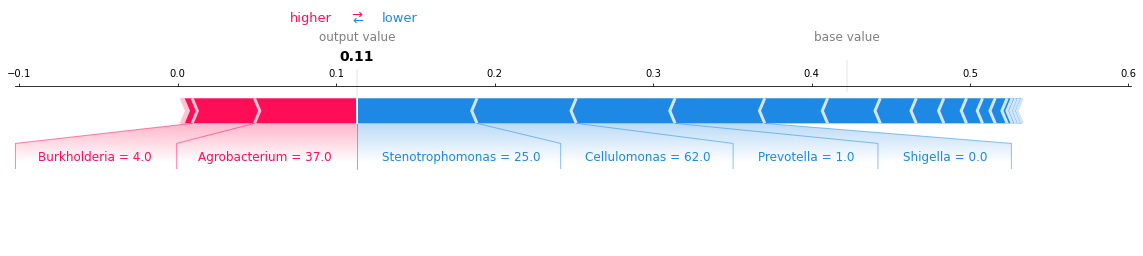

In [23]:
j = 23

print(f'Actual Classification {y[j]}')
print(raw_CR.index[j])

shap.force_plot(explainer_CR.expected_value, 
                shap_CR[j,:], 
                raw_CR.iloc[j,:],
                show=False,
                matplotlib=True)

plt.savefig(results / 'CR_force_plot.png', dpi=600, format='png', bbox_inches='tight')

### Final Results

In [24]:
display(metric_df)

metric_df.to_csv(results / 'karius_drop_confirmed_features_results.csv', index=True, header=True)

,test_precision,test_recall,test_F1,test_AUROC
Without Confirmed,0.928,0.939,0.931,0.990
Without Confirmed (RA),0.919,0.937,0.925,0.981
Only Confirmed,0.929,0.862,0.886,0.950
Only Confirmed (RA),0.930,0.913,0.917,0.975
Simple Decontam without Confirmed,0.782,0.761,0.765,0.911
Simple Decontam without Confirmed (RA),0.803,0.787,0.791,0.900
Without Confirmed CR,0.803,0.727,0.756,0.915
Without Confirmed (RA),0.828,0.736,0.772,0.903


### What is the performance of single features for classification?

In [25]:
single_scores = []
genera = []

# Get CV-ed AUCs for each single feature in the CR feature space
for i in range(raw_CR.shape[1]):
    genus_name = raw_CR.columns[i]
    result, _ = optimise_evaluate(pd.DataFrame(raw_CR.iloc[:, i]), y)
    auc = result.loc['test_AUROC']
    single_scores.append(auc)
    genera.append(genus_name)
    
aurocs_df = pd.DataFrame({'Genus': genera, 'CV-ed AUROC': single_scores})
display(aurocs_df)
    
aurocs_df.to_csv(results / 'single_feature_auroc_no_confirmed.csv', index=False, header=True)

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


,Genus,CV-ed AUROC
0,Cellulomonas,0.628498
1,Pantoea,0.588414
2,Cronobacter,0.605905
3,Megasphaera,0.617068
4,Prevotella,0.685361
5,Stenotrophomonas,0.715553
6,Shigella,0.659046
7,Shewanella,0.582977
8,Bacillus,0.660985
9,Alphatorquevirus,0.637010
